In [161]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

In [162]:
df = pd.read_csv('features.csv', sep='|', index_col=0)
df.head()

,Headline,Source,Date,Word Count,Company,Industry,IPO Period,Day of Week,Source Tier,PositiveScore,...,Mngr2,Mngr3,Mngr4,Mngr5,Mngr6,Offer Date +90,Date_y,Close +90,% Px Chng +90,Label
0,FACEBOOK ROLLS OUT NEW ADS TO WOO MADISON AVEN...,Aberdeen American News,2012-02-29,358,Facebook,Technology,1,4,4,0.0,...,J.P. Morgan,Goldman Sachs,NaN,NaN,NaN,2012-08-16,2012-08-16,19.87,-0.480251,Negative
1,FACEBOOK PRICES ITS STOCK AT $38 A SHARE FOR IPO,Aberdeen American News,2012-05-17,515,Facebook,Technology,1,5,4,0.0,...,J.P. Morgan,Goldman Sachs,NaN,NaN,NaN,2012-08-16,2012-08-16,19.87,-0.480251,Negative
2,REGULATORS LOOKING INTO MORGAN STANLEY ROLE IN...,Aberdeen American News,2012-05-22,288,Facebook,Technology,2,3,4,0.0,...,J.P. Morgan,Goldman Sachs,NaN,NaN,NaN,2012-08-16,2012-08-16,19.87,-0.480251,Negative
3,"FACEBOOK, MORGAN STANLEY FACE CLASS-ACTION SUI...",Aberdeen American News,2012-05-23,583,Facebook,Technology,2,4,4,0.0,...,J.P. Morgan,Goldman Sachs,NaN,NaN,NaN,2012-08-16,2012-08-16,19.87,-0.480251,Negative
4,FAQ: Facebook's IPO,Abilene Reporter-News,2012-02-03,947,Facebook,Technology,1,6,4,0.0,...,J.P. Morgan,Goldman Sachs,NaN,NaN,NaN,2012-08-16,2012-08-16,19.87,-0.480251,Negative


In [163]:
## Replacing all the numbers in the text to 'NUM_' to simplify and reduce total featues

text_data = df['Headline'].replace('\d+', 'NUM_', regex=True)
text_data

0       FACEBOOK ROLLS OUT NEW ADS TO WOO MADISON AVEN...
1       FACEBOOK PRICES ITS STOCK AT $NUM_ A SHARE FOR...
2       REGULATORS LOOKING INTO MORGAN STANLEY ROLE IN...
3       FACEBOOK, MORGAN STANLEY FACE CLASS-ACTION SUI...
4                                     FAQ: Facebook's IPO
5                     Facebook IPO set to be global giant
6       Mobile, local are key to Facebook's post-IPO g...
7       Pre-Facebook U.S. IPO Market Off to a Sluggish...
8       Facebook CEO turns NUM_, IPO could be $NUM_B gift
9             Facebook raises IPO price as offering nears
10           Facebook's $NUM_B IPO one of world's largest
11          Road to IPO: Milestones in Facebook's history
12      Road to IPO: Milestones in Facebook's history ...
13              Facebook hits new low as IPO lock-up ends
14                  FACEBOOK PREPARES FOR RECORD-HIGH IPO
15                  Dude, Where's My Facebook IPO Filing?
16      Meet The Less-Known Face Of The Facebook IPO, ...
17       Faceb

In [164]:
vectorizer = CountVectorizer(analyzer='word', stop_words='english')

In [165]:
vectorizer.fit(text_data)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [166]:
vectorizer.get_feature_names()
#vectorizer.vocabulary_

['abandons',
 'abercrombie',
 'ability',
 'able',
 'abound',
 'abounding',
 'accel',
 'accelerate',
 'acceleration',
 'access',
 'accessibility',
 'accommodations',
 'according',
 'account',
 'accounting',
 'accounts',
 'accusations',
 'accused',
 'achievements',
 'achilles',
 'ackaman',
 'acquired',
 'acquisition',
 'acquisitions',
 'acsoi',
 'act',
 'action',
 'actions',
 'active',
 'activity',
 'ad',
 'adapt',
 'add',
 'added',
 'adding',
 'additional',
 'address',
 'addressed',
 'addressing',
 'adds',
 'admits',
 'adp',
 'adrs',
 'ads',
 'advance',
 'adventure',
 'advertis',
 'advertisers',
 'advertisi',
 'advertising',
 'advice',
 'advise',
 'adviser',
 'advisers',
 'advisory',
 'advocates',
 'affair',
 'affect',
 'affected',
 'affects',
 'affordable',
 'aflutter',
 'afraid',
 'aftermath',
 'aftershocks',
 'age',
 'agency',
 'agenda',
 'agent',
 'aggregate',
 'aggressive',
 'ago',
 'agreements',
 'agrees',
 'ah',
 'ahead',
 'ailing',
 'aim',
 'aiming',
 'aims',
 'ain',
 'air',
 'a

In [167]:
pd.DataFrame.from_dict(vectorizer.vocabulary_, orient='index').sort_values(by=0, ascending=False)

,0
œtwitter,4710
œquiet,4709
œmarried,4708
œlife,4707
œkick,4706
zynga,4705
zuckers,4704
zuckerberg,4703
zuck,4702
zone,4701


#### Transform to Document Term Matrix

In [168]:
dtm = vectorizer.transform(text_data)
dtm

<5301x4711 sparse matrix of type '<class 'numpy.int64'>'
	with 40946 stored elements in Compressed Sparse Row format>

In [169]:
Text_Features = pd.DataFrame(dtm.toarray(), columns=vectorizer.get_feature_names())
Text_Features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5301 entries, 0 to 5300
Columns: 4711 entries, abandons to œtwitter
dtypes: int64(4711)
memory usage: 190.5 MB


In [80]:
#Text_Features.to_csv('TEXT_FEATURES.csv')

In [170]:
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

X = Text_Features
y = np.array(df['Label'].tolist())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)
print(X_train.shape, y_train.shape)

(3975, 4711) (3975,)


In [171]:
nb = MultinomialNB()

In [172]:
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [173]:
y_pred_class = nb.predict(X_test)

In [174]:
metrics.accuracy_score(y_test, y_pred_class)

0.9924585218702866

In [175]:
df['Label'].value_counts()

Negative    3056
Positive    2245
Name: Label, dtype: int64

## Yellowbrick Classification Report

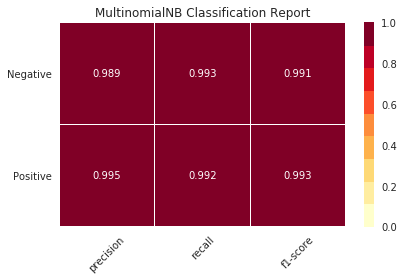

In [176]:
from yellowbrick.classifier import ClassificationReport
bayes = MultinomialNB()
visualizer = ClassificationReport(bayes, classes=['Positive', 'Negative'])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
g = visualizer.poof()

## Confusion Matrix

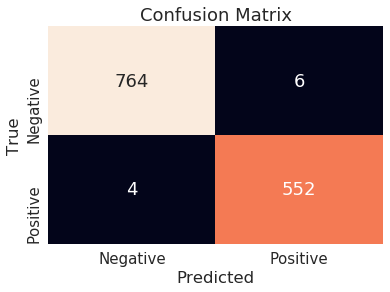

In [185]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_class)
sns.set(font_scale=1.5)

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, fmt='g', cbar=False)


ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
#plt.tight_layout()
#plt.figure(figsize=(10,10))
plt.show()